# Capstone project EDA

### By Victor Ramirez

In [2]:
# Import the libraries we'll use below.

# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import math
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from keras import models
from keras import layers

# plots
import seaborn as sns  # for nicer plots
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # default style
import plotly.express as px

from scipy import stats # For in-built method to get PCC

random.seed(2)
%matplotlib inline

## Understanding the data

Before doing any training (or evaluating), let's make sure we understand what we're working with. 

### Load the data

We'll only use a few of the columns.

In [3]:
# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
sf_data = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
    # '/Users/RamirezV/Documents/GitHub/uc berkeley/210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
)

# ca_data = pd.read_csv(
#     'F:/code/uc berkeley/mids-210/datasciw210/EDA/hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.xlsx'
# )

# sf_data.drop(columns=['location'], inplace = True)


## Read data

In [4]:
sf_data.dtypes


Incident Datetime                                        object
Incident Date                                            object
Incident Time                                            object
Incident Year                                             int64
Incident Day of Week                                     object
Report Datetime                                          object
Row ID                                                    int64
Incident ID                                               int64
Incident Number                                           int64
CAD Number                                              float64
Report Type Code                                         object
Report Type Description                                  object
Filed Online                                             object
Incident Code                                             int64
Incident Category                                        object
Incident Subcategory                    

In [5]:
sf_data.count()      # Used to count the number of rows

Incident Datetime                                       690745
Incident Date                                           690745
Incident Time                                           690745
Incident Year                                           690745
Incident Day of Week                                    690745
Report Datetime                                         690745
Row ID                                                  690745
Incident ID                                             690745
Incident Number                                         690745
CAD Number                                              536121
Report Type Code                                        690745
Report Type Description                                 690745
Filed Online                                            139069
Incident Code                                           690745
Incident Category                                       690179
Incident Subcategory                                   

In [6]:
# data EDA
print(sf_data.describe())

       Incident Year        Row ID   Incident ID  Incident Number  \
count  690745.000000  6.907450e+05  6.907450e+05     6.907450e+05   
mean     2019.958135  9.302732e+10  9.302729e+05     2.011725e+08   
std         1.477545  1.787198e+10  1.787198e+05     1.534261e+07   
min      2018.000000  6.186871e+10  6.186870e+05     0.000000e+00   
25%      2019.000000  7.757161e+10  7.757160e+05     1.901730e+08   
50%      2020.000000  9.298990e+10  9.298990e+05     2.003680e+08   
75%      2021.000000  1.084700e+11  1.084700e+06     2.108237e+08   
max      2023.000000  1.240776e+11  1.240775e+06     9.814243e+08   

         CAD Number  Incident Code           CNN  Supervisor District  \
count  5.361210e+05  690745.000000  6.540610e+05        654061.000000   
mean   2.020950e+08   24602.353554  2.532055e+07             5.965713   
std    2.378168e+07   25645.896287  3.093293e+06             2.807968   
min    1.000000e+00    1000.000000  2.001300e+07             1.000000   
25%    1.9066

In [7]:
sf_data = sf_data.drop_duplicates()
sf_data.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/07/25 12:00:00 AM,2021/07/25,00:00,2021,Sunday,2021/07/25 01:41:00 PM,105718906372,1057189,216105573,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/06/28 11:58:00 PM,2022/06/28,23:58,2022,Tuesday,2022/06/28 11:58:00 PM,116554371012,1165543,220264913,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/03/11 10:30:00 AM,2022/03/11,10:30,2022,Friday,2022/03/11 08:03:00 PM,113048071000,1130480,226040232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/05/15 05:47:00 PM,2021/05/15,17:47,2021,Saturday,2021/05/15 05:47:00 PM,103051807043,1030518,210183345,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/06/28 05:22:00 PM,2022/06/28,17:22,2022,Tuesday,2022/06/28 05:22:00 PM,116535107041,1165351,220361741,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sf_data.count()

Incident Datetime                                       690745
Incident Date                                           690745
Incident Time                                           690745
Incident Year                                           690745
Incident Day of Week                                    690745
Report Datetime                                         690745
Row ID                                                  690745
Incident ID                                             690745
Incident Number                                         690745
CAD Number                                              536121
Report Type Code                                        690745
Report Type Description                                 690745
Filed Online                                            139069
Incident Code                                           690745
Incident Category                                       690179
Incident Subcategory                                   

In [9]:
# data cleaning

# check for null values
print(sf_data.isnull().sum())

columns = sf_data.columns
##################
### DROP zeros ###
##################
for col in columns:
    if (sf_data[col] == 0).all():
        print('All values in ', col ,' column are zero dropping col')
        del sf_data[col]
    else:
        print('All values in ', col ,' column are not zero')
    

print('Number of features: %s' %sf_data.shape[1])
print('Number of examples: %s' %sf_data.shape[0])

# print('Number of location', len(pd.unique(sf_data['location'])))

# Find unique values of a column
# print(sf_data['location'].unique())

print(sf_data.columns.tolist())

print('Columns in my data: ', sf_data.columns.tolist())


Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                              154624
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            551676
Incident Code                                                0
Incident Category                                          566
Incident Subcategory                                   

In [10]:
# replace white spaces with underscore
sf_data.columns = sf_data.columns.str.replace(' ', '_')
print(sf_data.columns.tolist())

['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year', 'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID', 'Incident_Number', 'CAD_Number', 'Report_Type_Code', 'Report_Type_Description', 'Filed_Online', 'Incident_Code', 'Incident_Category', 'Incident_Subcategory', 'Incident_Description', 'Resolution', 'Intersection', 'CNN', 'Police_District', 'Analysis_Neighborhood', 'Supervisor_District', 'Latitude', 'Longitude', 'Point', 'Neighborhoods', 'ESNCAG_-_Boundary_File', 'Central_Market/Tenderloin_Boundary_Polygon_-_Updated', 'Civic_Center_Harm_Reduction_Project_Boundary', 'HSOC_Zones_as_of_2018-06-05', 'Invest_In_Neighborhoods_(IIN)_Areas', 'Current_Supervisor_Districts', 'Current_Police_Districts']


In [11]:
# shuffle order
indices = np.arange(sf_data.shape[0])
print('indices:', indices, '\n')

# set seed
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# reindex to change the ordering of the original
sf_data = sf_data.reindex(shuffled_indices)
display(sf_data)


indices: [     0      1      2 ... 690742 690743 690744] 

shuffled indices: [370755  18943 243696 ... 117952 435829 305711] 



,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,CAD_Number,...,Longitude,Point,Neighborhoods,ESNCAG_-_Boundary_File,Central_Market/Tenderloin_Boundary_Polygon_-_Updated,Civic_Center_Harm_Reduction_Project_Boundary,HSOC_Zones_as_of_2018-06-05,Invest_In_Neighborhoods_(IIN)_Areas,Current_Supervisor_Districts,Current_Police_Districts
370755,2019/06/06 05:00:00 AM,2019/06/06,05:00,2019,Thursday,2019/06/06 12:13:00 PM,80911206224,809112,196110014,NaN,...,-122.414711,POINT (-122.41471100473302 37.77623051953945),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
18943,2021/06/11 11:00:00 AM,2021/06/11,11:00,2021,Friday,2021/06/11 11:35:00 AM,103930628150,1039306,210363199,211621354.0,...,-122.408709,POINT (-122.4087086749172 37.780971182329765),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
243696,2021/05/04 06:29:00 PM,2021/05/04,18:29,2021,Tuesday,2021/05/04 06:35:00 PM,102731415161,1027314,210273764,211242798.0,...,-122.420581,POINT (-122.42058060938771 37.76499626872751),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
486709,2019/12/07 05:00:00 PM,2019/12/07,17:00,2019,Saturday,2020/02/26 01:32:00 PM,90732806244,907328,196269508,NaN,...,-122.410937,POINT (-122.41093657493794 37.77921168445851),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
565267,2020/11/16 01:22:00 PM,2020/11/16,13:22,2020,Monday,2020/11/16 02:00:00 PM,97893506361,978935,200692481,203211767.0,...,-122.413975,POINT (-122.41397500878728 37.80748251193778),99.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,2019/06/17 01:22:00 PM,2019/06/17,13:22,2019,Monday,2019/06/17 01:22:00 PM,81257512015,812575,190435917,191682034.0,...,-122.416720,POINT (-122.41671959504018 37.75716664165998),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
152315,2022/06/08 10:10:00 PM,2022/06/08,22:10,2022,Wednesday,2022/06/08 11:44:00 PM,115891919057,1158919,220376790,221593357.0,...,-122.426180,POINT (-122.42618004477822 37.80109545463191),17.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
117952,2022/02/19 11:30:00 PM,2022/02/19,23:30,2022,Saturday,2022/02/20 10:19:00 AM,112521006372,1125210,226028410,NaN,...,-122.434405,POINT (-122.43440469982856 37.80005154768055),NaN,NaN,NaN,NaN,NaN,NaN,6.0,4.0
435829,2019/12/04 11:21:00 PM,2019/12/04,23:21,2019,Wednesday,2019/12/04 11:21:00 PM,87724765010,877247,190915038,193384499.0,...,-122.415251,POINT (-122.41525065017504 37.764705299011204),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0


## Visual EDA

In [12]:
print(sf_data.columns.tolist())

['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year', 'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID', 'Incident_Number', 'CAD_Number', 'Report_Type_Code', 'Report_Type_Description', 'Filed_Online', 'Incident_Code', 'Incident_Category', 'Incident_Subcategory', 'Incident_Description', 'Resolution', 'Intersection', 'CNN', 'Police_District', 'Analysis_Neighborhood', 'Supervisor_District', 'Latitude', 'Longitude', 'Point', 'Neighborhoods', 'ESNCAG_-_Boundary_File', 'Central_Market/Tenderloin_Boundary_Polygon_-_Updated', 'Civic_Center_Harm_Reduction_Project_Boundary', 'HSOC_Zones_as_of_2018-06-05', 'Invest_In_Neighborhoods_(IIN)_Areas', 'Current_Supervisor_Districts', 'Current_Police_Districts']


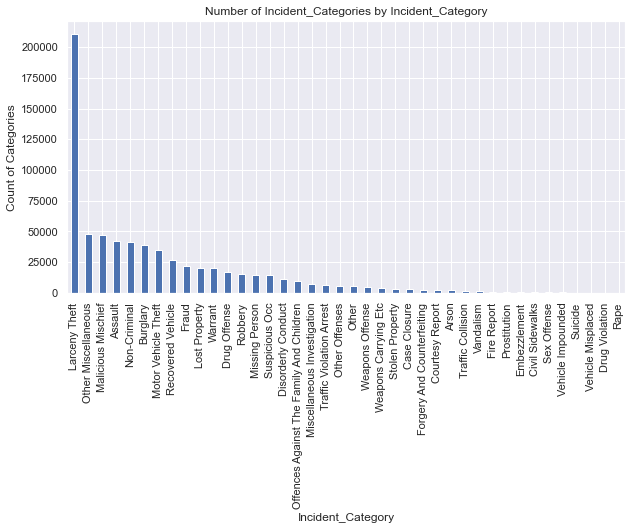

In [13]:
sf_data.Incident_Category.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Incident_Categories by Incident_Category")
plt.ylabel('Count of Categories')
plt.xlabel('Incident_Category');

,Incident_Year,Row_ID,Incident_ID,Incident_Number,CAD_Number,Incident_Code,CNN,Supervisor_District,Latitude,Longitude,Neighborhoods,ESNCAG_-_Boundary_File,Central_Market/Tenderloin_Boundary_Polygon_-_Updated,Civic_Center_Harm_Reduction_Project_Boundary,HSOC_Zones_as_of_2018-06-05,Invest_In_Neighborhoods_(IIN)_Areas,Current_Supervisor_Districts,Current_Police_Districts
Incident_Year,1.000000,0.974192,0.974192,0.953873,0.614584,-0.030543,-0.007346,0.004948,-0.014916,-0.011701,0.013675,NaN,NaN,NaN,-0.015390,NaN,0.012878,0.007839
Row_ID,0.974192,1.000000,1.000000,0.942272,0.621568,-0.031924,-0.004902,0.002589,-0.014072,-0.013197,0.013089,NaN,NaN,NaN,-0.013994,NaN,0.013194,0.009289
Incident_ID,0.974192,1.000000,1.000000,0.942272,0.621568,-0.031926,-0.004902,0.002589,-0.014072,-0.013197,0.013089,NaN,NaN,NaN,-0.013994,NaN,0.013194,0.009289
Incident_Number,0.953873,0.942272,0.942272,1.000000,0.616055,-0.062365,0.002929,-0.011989,-0.000299,-0.020122,0.015323,NaN,NaN,NaN,-0.008546,NaN,0.011144,0.011180
CAD_Number,0.614584,0.621568,0.621568,0.616055,1.000000,-0.014048,-0.007954,0.009261,-0.015385,-0.001373,0.003834,NaN,NaN,NaN,-0.019532,NaN,0.019106,-0.006085
Incident_Code,-0.030543,-0.031924,-0.031926,-0.062365,-0.014048,1.000000,-0.031806,0.057081,-0.046244,0.017047,-0.022258,NaN,NaN,NaN,-0.026365,NaN,0.019217,-0.010018
CNN,-0.007346,-0.004902,-0.004902,0.002929,-0.007954,-0.031806,1.000000,-0.413833,0.373584,-0.201480,-0.193762,NaN,NaN,NaN,-0.080817,NaN,0.071967,0.039328
Supervisor_District,0.004948,0.002589,0.002589,-0.011989,0.009261,0.057081,-0.413833,1.000000,-0.765226,0.319641,0.218370,NaN,NaN,NaN,0.616042,NaN,0.043021,-0.218124
Latitude,-0.014916,-0.014072,-0.014072,-0.000299,-0.015385,-0.046244,0.373584,-0.765226,1.000000,0.153634,-0.197002,NaN,NaN,NaN,-0.624191,NaN,0.076934,-0.224491
Longitude,-0.011701,-0.013197,-0.013197,-0.020122,-0.001373,0.017047,-0.201480,0.319641,0.153634,1.000000,0.190513,NaN,NaN,NaN,-0.492399,NaN,0.131168,-0.698585


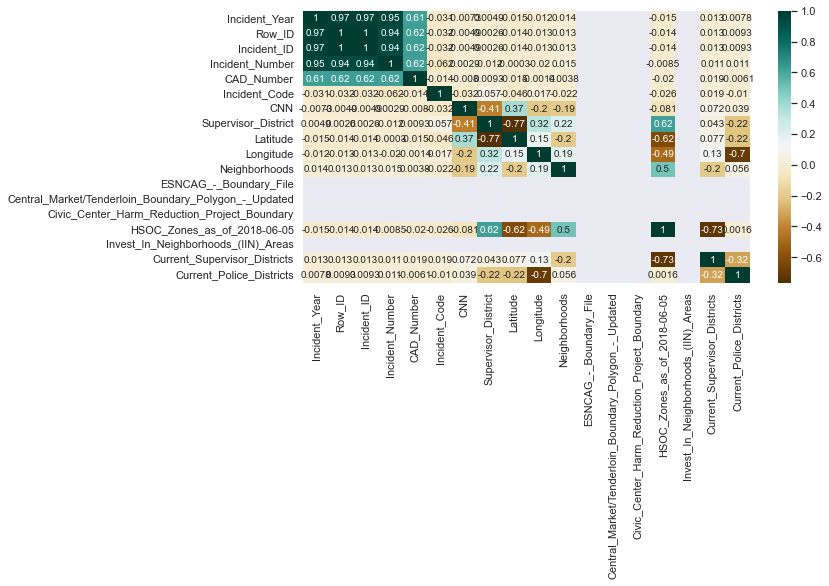

In [14]:
plt.figure(figsize=(10,5))
c= sf_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [15]:
# visual hate_crime_incident_count summary in a treemap plot

# fig = px.treemap(fbi_data, path=[px.Constant("hate_crime_incident_count EDA"), 'location', 'year', 'month'], 
                 # values='hate_crime_incident_count')
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

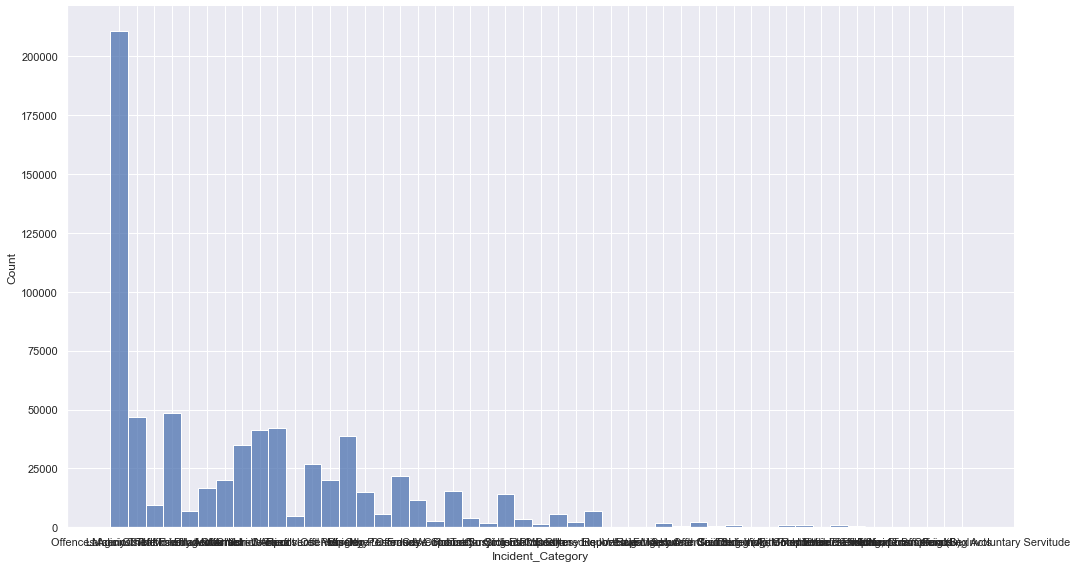

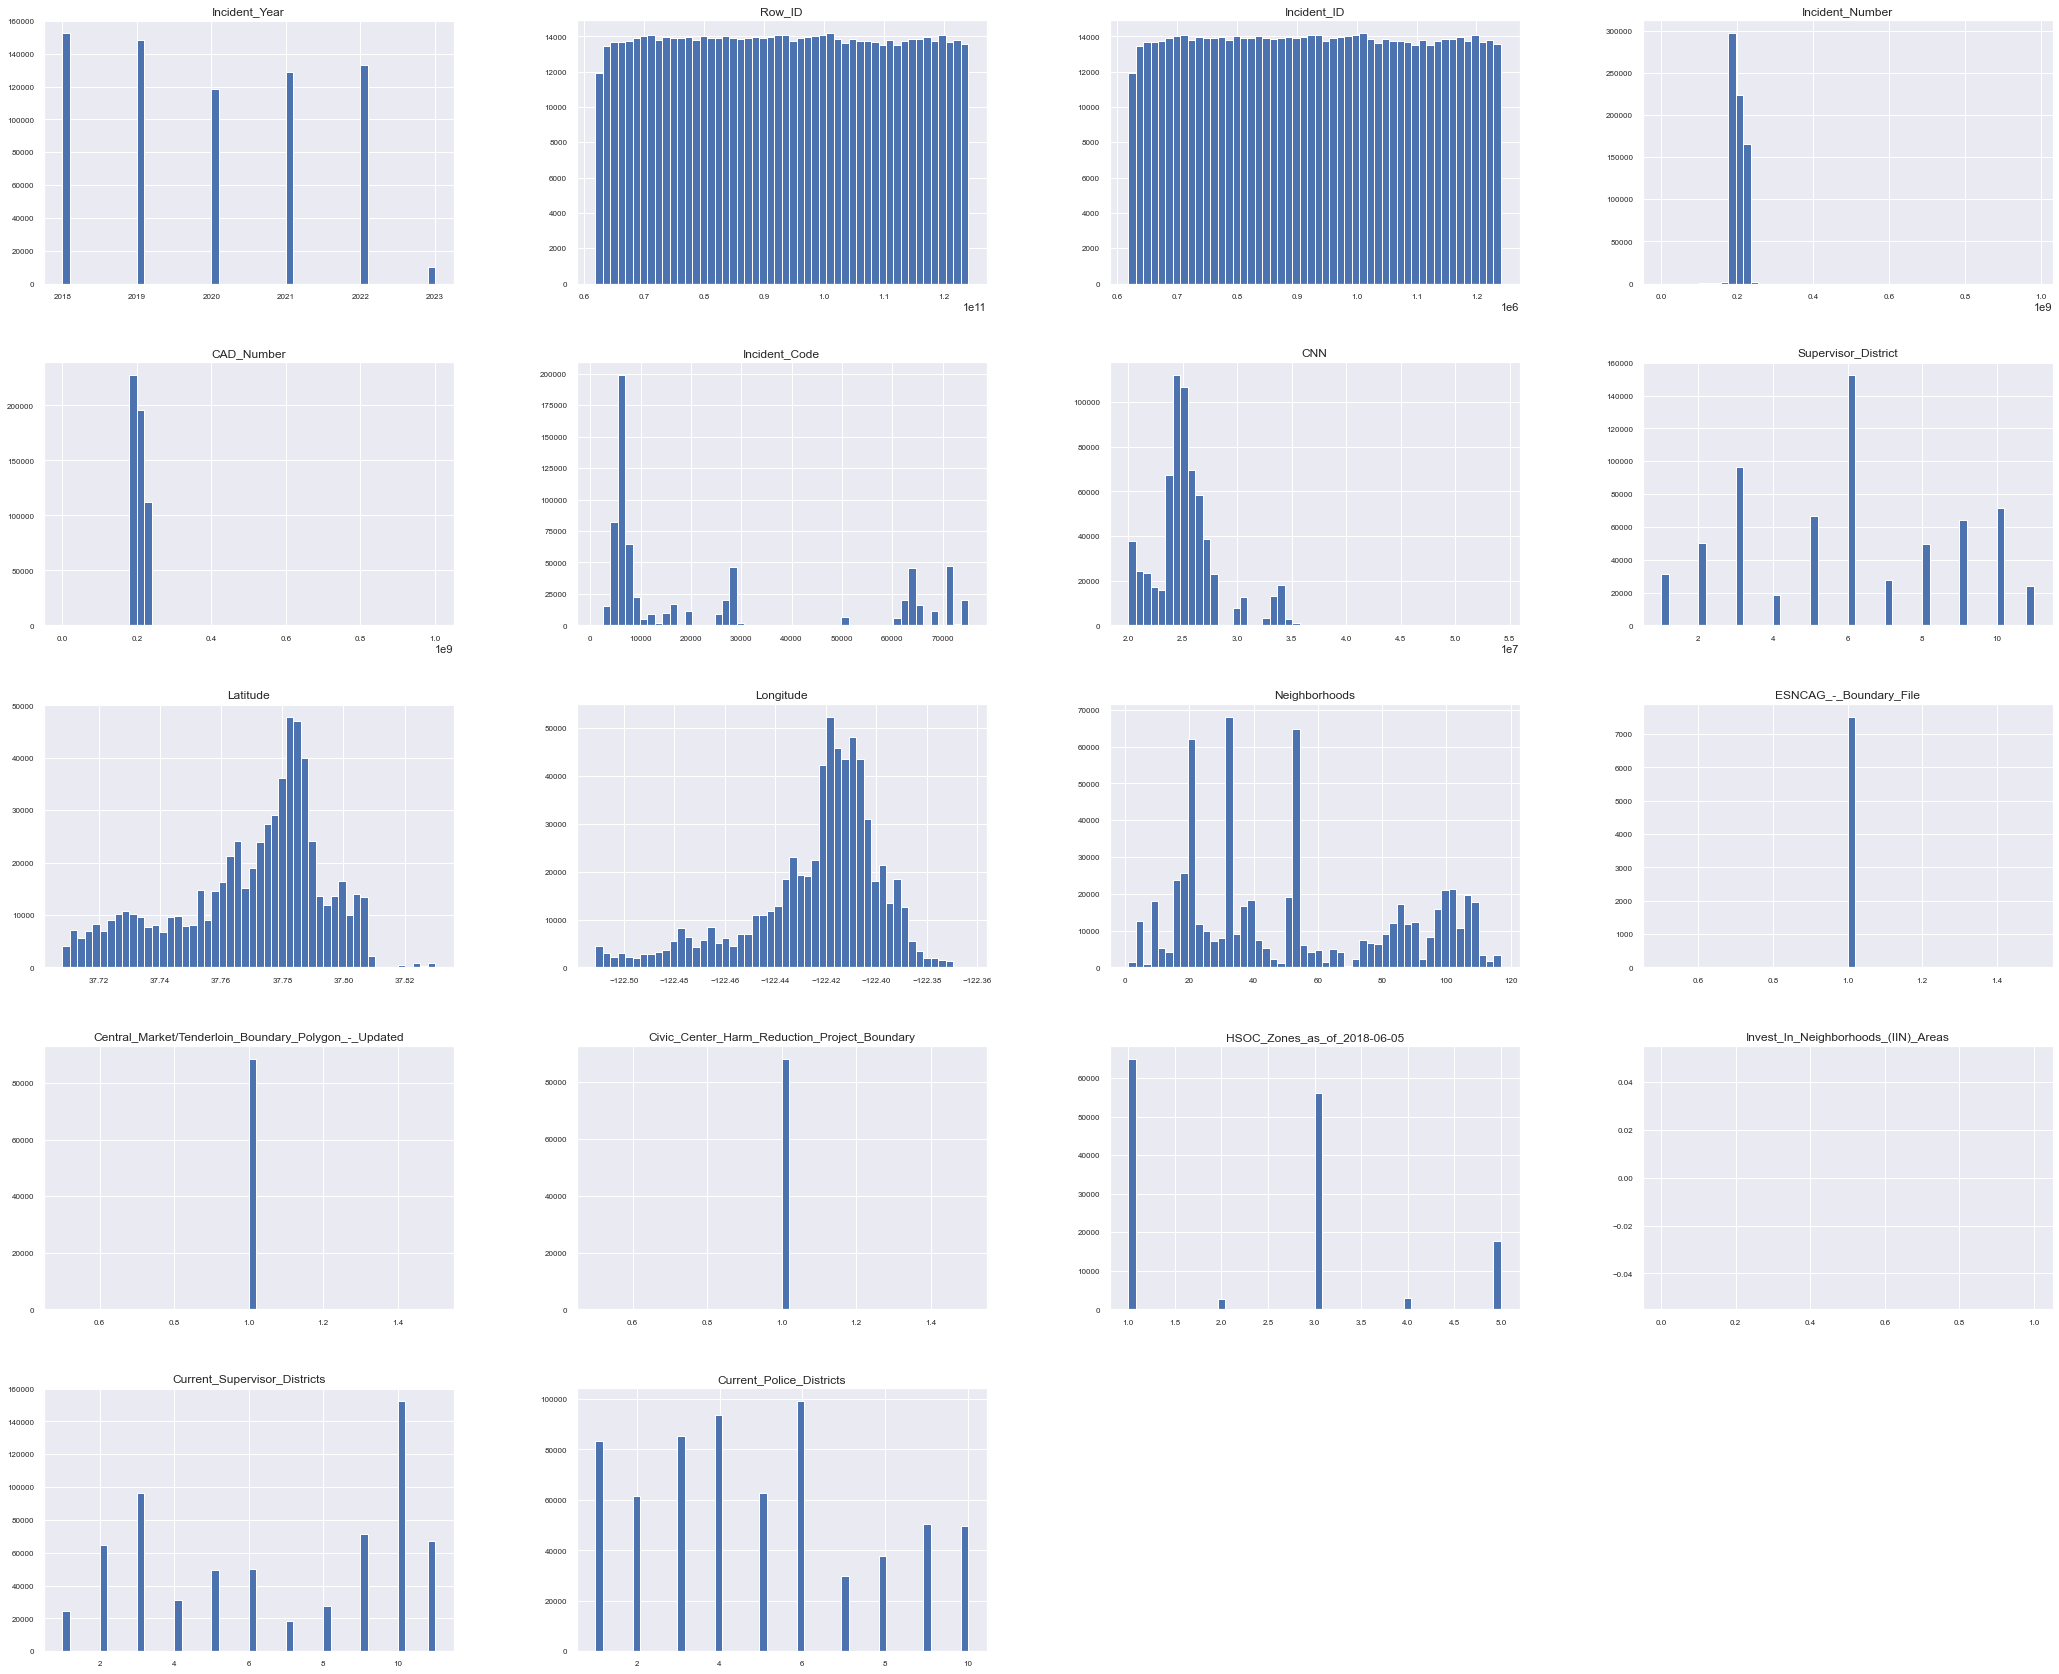

In [16]:
# visual EDA 

#plot the histogram of Incident_Category to see the distribution of the point data
sns.displot(sf_data, x="Incident_Category", height=8, aspect=15/8)

#plot the histogram of all features to see the distribution of the point data
sf_data.hist(figsize=(36, 30), bins=50, xlabelsize=8, ylabelsize=8);


## Correlation EDA

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


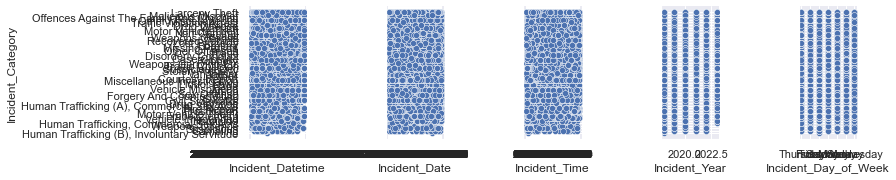

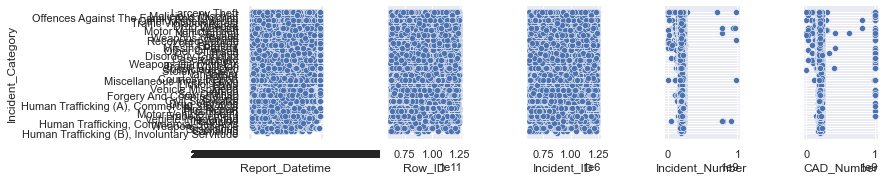

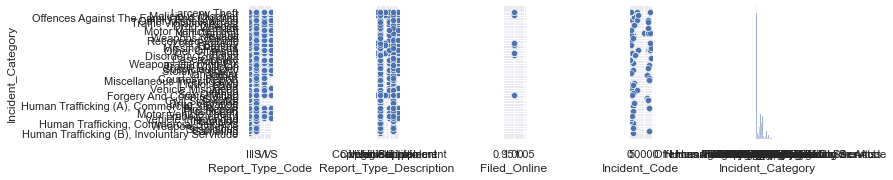

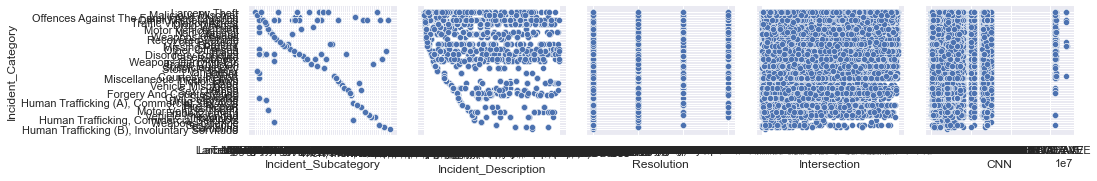

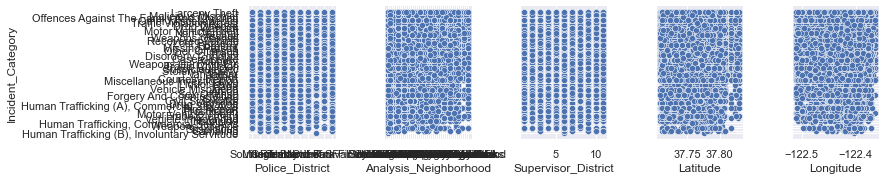

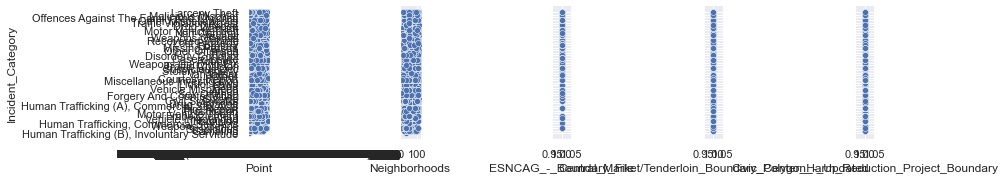

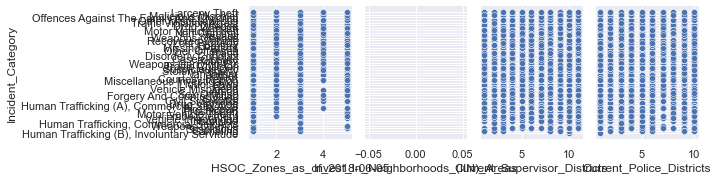

In [17]:
# more EDA
# display all the correlated values to find outliers
for i in range(0, len(sf_data.columns), 5):
    sns.pairplot(data=sf_data, x_vars=sf_data.columns[i:i+5], y_vars=['Incident_Category'])


In [18]:
# more correlation EDA 
corr = sf_data.drop('Incident_Category', axis=1).corr()

plt.figure(figsize=(50, 50))
# viridis color
# sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws=


<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

### Feature selection

### Train/Test split

## Model

``Build model``

### Build and Train a Model